In [17]:
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from sqlalchemy.ext.automap import automap_base
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from config import info
from sqlalchemy import inspect
from sqlalchemy.orm import Session
import matplotlib.pyplot as plt

In [9]:
engine = create_engine(f'postgresql+psycopg2://{info}')

Base = automap_base()
Base.prepare(engine, schema='market', reflect=True)

instagram = Base.classes.instagram

instagram_hash_post = Base.classes.instagram_hash_post

instagram_hashtag = Base.classes.instagram_hashtag

session = Session(engine)

instgram_result = session.query(instagram)

ig_df = pd.read_sql(instgram_result.statement, con=engine.connect())

ig_df


/var/folders/fy/fl5q9lyx5cl_4sqy67dvl7f80000gn/T/ipykernel_97989/2574185825.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, schema='market', reflect=True)


,id,type,commentscount,likescount,ig_timestamp,videoviewcount,videoplaycount,videoduration
0,3.075854765464166e+18,Sidecar,1.0,17.0,2023-04-07 18:01:40,NaN,NaN,NaN
1,3.070078623458052e+18,Image,0.0,17.0,2023-03-30 18:45:16,NaN,NaN,NaN
2,3.0787400049486223e+18,Video,0.0,8.0,2023-04-11 17:35:00,97.0,242.0,5.202
3,3.073725354955596e+18,Image,1.0,17.0,2023-04-04 19:30:37,NaN,NaN,NaN
4,3.06935386837853e+18,Image,1.0,10.0,2023-03-29 18:45:18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
190,2.820808543447755e+18,Image,2.0,31.0,2022-04-20 20:30:06,NaN,NaN,NaN
191,2.8156445350625736e+18,Image,0.0,17.0,2022-04-13 17:30:09,NaN,NaN,NaN
192,2.8273166147725676e+18,Image,0.0,12.0,2022-04-29 20:00:28,NaN,NaN,NaN
193,2.821493059556366e+18,Image,0.0,16.0,2022-04-21 19:10:07,NaN,NaN,NaN


In [10]:
instagram_hash_post_result = session.query(instagram_hash_post)

ig_hp_df = pd.read_sql(instagram_hash_post_result.statement, con=engine.connect())

ig_hp_df


,index,id,hashtag_index
0,0,3.075854765464166e+18,0
1,1,3.075854765464166e+18,1
2,2,3.075854765464166e+18,2
3,3,3.075854765464166e+18,3
4,4,3.075854765464166e+18,4
...,...,...,...
1653,1653,2.8222431993343503e+18,52
1654,1654,2.8222431993343503e+18,51
1655,1655,2.8222431993343503e+18,53
1656,1656,2.8222431993343503e+18,19


In [11]:
instagram_hashtags_result = session.query(instagram_hashtag)

ig_hashtag_df = pd.read_sql(instagram_hashtags_result.statement, con=engine.connect())
ig_hashtag_df


,index_num,hashtag
0,0,tech
1,1,essentialtool
2,2,jobs
3,3,tapin
4,4,techindustry
...,...,...
503,503,giveback
504,504,socialimpact
505,505,graphicdesigner
506,506,worldcreativityandinnovationday


In [12]:
session.close()

In [14]:
#Merge ig_df and ig_hp_df based on the 'id' column
merged_df = pd.merge(ig_df, ig_hp_df, on='id', how='left')

# Merge merged_df and ig_hashtag_df based on the 'hashtag_index' and 'index_num' columns
working_df = pd.merge(merged_df, ig_hashtag_df, left_on='hashtag_index', right_on='index_num', how='left')

# Print the final merged dataframe
print(working_df)

working_df.to_csv('working.csv')


                          id     type  commentscount  likescount  \
0      3.075854765464166e+18  Sidecar            1.0        17.0   
1      3.075854765464166e+18  Sidecar            1.0        17.0   
2      3.075854765464166e+18  Sidecar            1.0        17.0   
3      3.075854765464166e+18  Sidecar            1.0        17.0   
4      3.075854765464166e+18  Sidecar            1.0        17.0   
...                      ...      ...            ...         ...   
1652  2.8222431993343503e+18    Image            1.0        19.0   
1653  2.8222431993343503e+18    Image            1.0        19.0   
1654  2.8222431993343503e+18    Image            1.0        19.0   
1655  2.8222431993343503e+18    Image            1.0        19.0   
1656  2.8222431993343503e+18    Image            1.0        19.0   

            ig_timestamp  videoviewcount  videoplaycount  videoduration  \
0    2023-04-07 18:01:40             NaN             NaN            NaN   
1    2023-04-07 18:01:40         

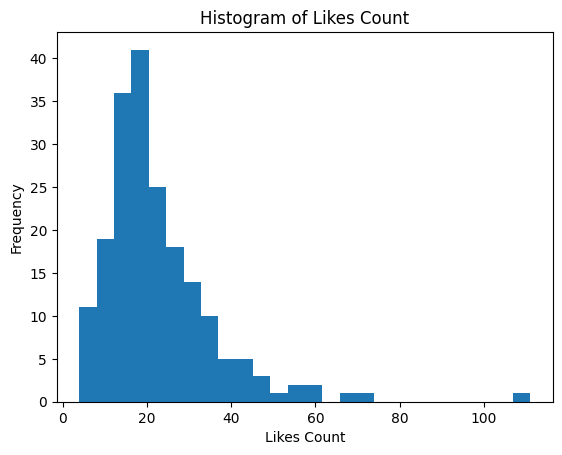

In [16]:
unique_ids_df = working_df.drop_duplicates(subset='id')

plt.hist(unique_ids_df['likescount'], bins='auto')
plt.xlabel('Likes Count')
plt.ylabel('Frequency')
plt.title('Histogram of Likes Count')
plt.show()


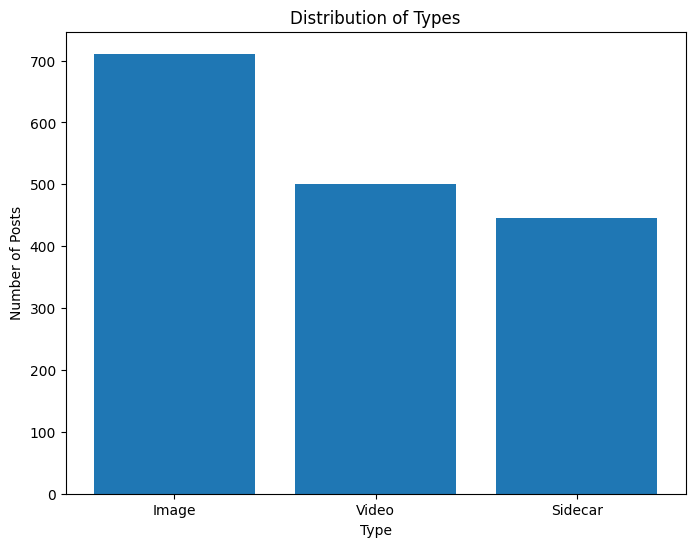

In [19]:
# Count the frequency of each type
type_counts = working_df['type'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
plt.bar(type_counts.index, type_counts.values)
plt.xlabel('Type')
plt.ylabel('Number of Posts')
plt.title('Distribution of Types')
plt.show()

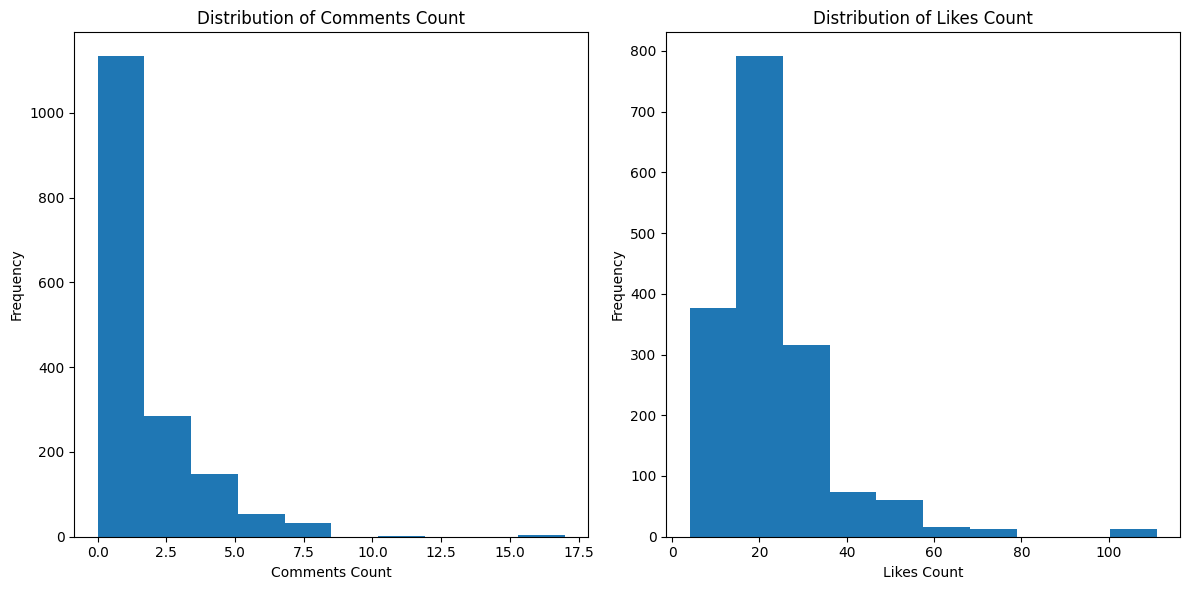

In [20]:
# Plot histograms for comments count and likes count
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(working_df['commentscount'], bins=10)
plt.xlabel('Comments Count')
plt.ylabel('Frequency')
plt.title('Distribution of Comments Count')

plt.subplot(1, 2, 2)
plt.hist(working_df['likescount'], bins=10)
plt.xlabel('Likes Count')
plt.ylabel('Frequency')
plt.title('Distribution of Likes Count')

plt.tight_layout()
plt.show()


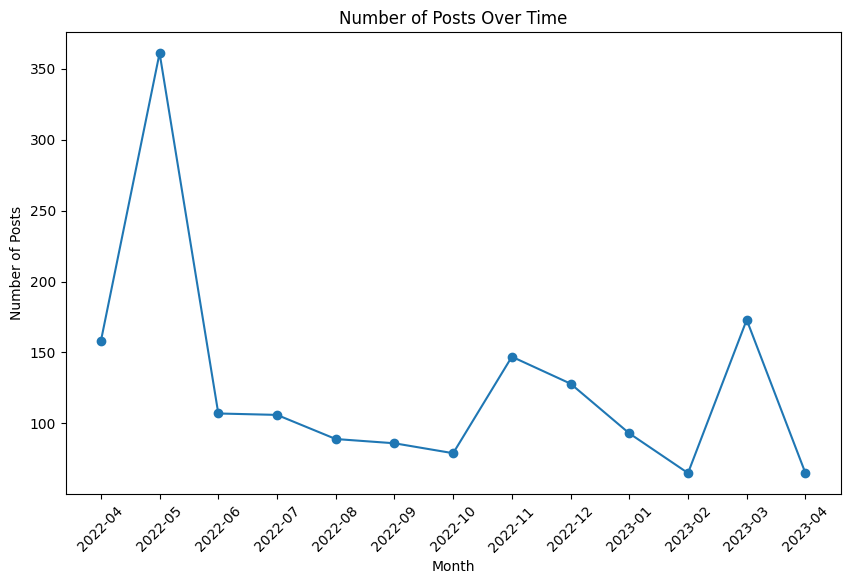

In [22]:
# Convert ig_timestamp column to datetime format
working_df['ig_timestamp'] = pd.to_datetime(working_df['ig_timestamp'])

# Group posts by month and count the number of posts per month
monthly_counts = working_df.groupby(working_df['ig_timestamp'].dt.to_period('M')).size()

# Convert PeriodIndex to string format for plotting
monthly_counts.index = monthly_counts.index.astype(str)

# Plot a line plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.title('Number of Posts Over Time')
plt.xticks(rotation=45)
plt.show()



In [31]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# QQ-plots
def generate_qq_plots(data, distribution):
    for column in data.columns:
        stats.probplot(data[column], dist=distribution, plot=plt)
        plt.title(f'QQ-Plot for {column}')
        plt.show()

# KS-tests
def perform_ks_tests(data, distribution):
    for column in data.columns:
        _, p_value = stats.kstest(data[column], distribution)
        print(f"KS-Test for {column}: p-value = {p_value}")

# Confidence Intervals
def calculate_confidence_intervals(data, confidence_level=0.95):
    n = len(data)
    mean = np.mean(data)
    std_error = stats.sem(data)
    margin_of_error = std_error * stats.t.ppf((1 + confidence_level) / 2, n - 1)
    confidence_interval = (mean - margin_of_error, mean + margin_of_error)
    return confidence_interval

# Scatter plots
def generate_scatter_plots(data, x_column, y_column):
    plt.scatter(data[x_column], data[y_column])
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Scatter Plot: {x_column} vs {y_column}')
    plt.show()

# Correlation Heatmap
def generate_correlation_heatmap(data):
    corr_matrix = data.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

# Box plots
def generate_box_plots(data, x_column, y_column):
    sns.boxplot(x=data[x_column], y=data[y_column])
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Box Plot: {x_column} vs {y_column}')
    plt.show()

# Line plots
def generate_line_plots(data, x_column, y_column):
    plt.plot(data[x_column], data[y_column])
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Line Plot: {x_column} vs {y_column}')
    plt.show()


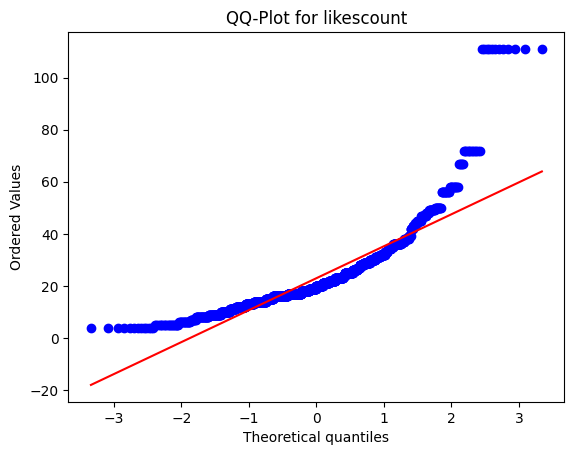

In [32]:
# Generate QQ-plots for 'likescount'
generate_qq_plots(working_df[['likescount']], 'norm')

In [30]:
perform_ks_tests(working_df[['likescount']], 'norm')


KS-Test for likescount: p-value = 0.0


In [33]:
# Calculate Confidence Intervals for 'likescount'
confidence_interval = calculate_confidence_intervals(working_df['likescount'])
print("Confidence Interval for 'likescount':", confidence_interval)

Confidence Interval for 'likescount': (22.31300151321771, 23.63989703750693)


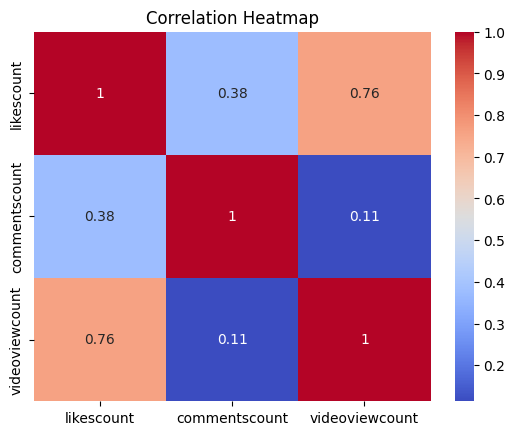

In [34]:
generate_correlation_heatmap(working_df[['likescount', 'commentscount', 'videoviewcount']])


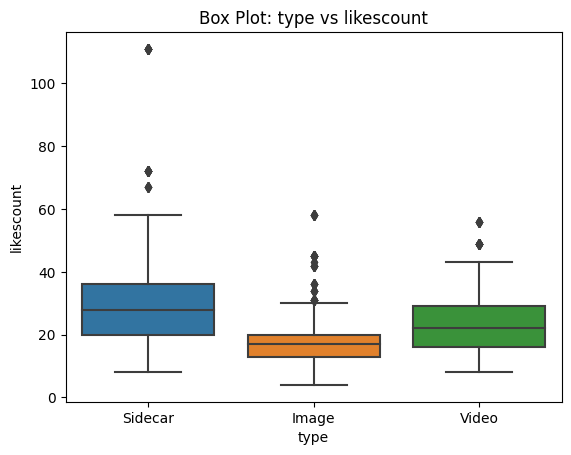

In [35]:
# Generate Box Plots
generate_box_plots(working_df, 'type', 'likescount')

/var/folders/fy/fl5q9lyx5cl_4sqy67dvl7f80000gn/T/ipykernel_97989/593311045.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_data = working_df.resample('W', on='ig_timestamp').mean()


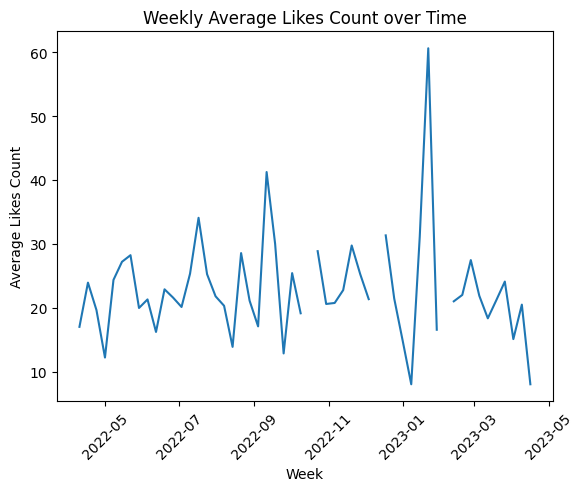

In [37]:
# Downsample the data to a specific time period (e.g., weekly)
weekly_data = working_df.resample('W', on='ig_timestamp').mean()

# Generate Line Plot for downsampled data
plt.plot(weekly_data.index, weekly_data['likescount'])
plt.xlabel('Week')
plt.ylabel('Average Likes Count')
plt.title('Weekly Average Likes Count over Time')
plt.xticks(rotation=45)
plt.show()

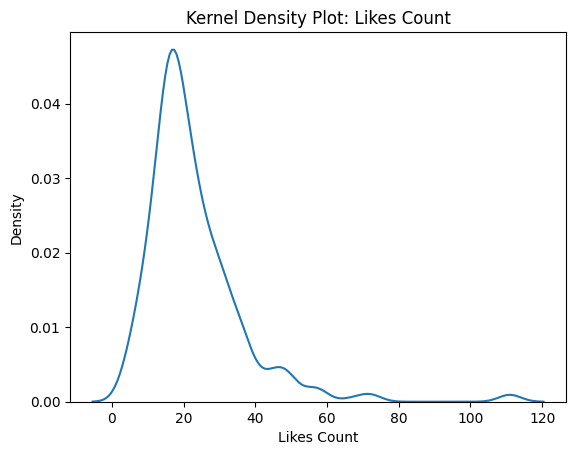

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kernel Density Plot
sns.kdeplot(working_df['likescount'])
plt.xlabel('Likes Count')
plt.ylabel('Density')
plt.title('Kernel Density Plot: Likes Count')
plt.show()


In [40]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality
statistic, p_value = shapiro(working_df['likescount'])
print("Shapiro-Wilk Test:")
print("Statistic:", statistic)
print("p-value:", p_value)


Shapiro-Wilk Test:
Statistic: 0.7925580739974976
p-value: 1.133650457638777e-41
